# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

##### Project Goal:

The goal of this project is to examine the dataset of job postings, and predict salaries for a new set of postings. - This will involve building a model to predict the salaries given in the test dataset.

##### Practical use:
HR Department of a large company or a Consulting groups that needs real-time solutions in order to make effective employment offers to potential hires.

It also finds use in getting to understand current realities in the job market and how businesses can leverage this in order to secure high quality talent, while keeping recuritment cost low.

The primary tool used for this project is Python 3, along with an extensive array of libraries and packages available for the manipulation of data,and development of predictive modeling algorithms.

##### Project Structure:

###### Defining the Problem: 
Creating "Data" and "Plots" classes and objects to aid us in extracting, manipulating the given data Exploratory Data Analysis This involves looking at the Data Summaries and Visualizations in order to:

Examine the Data Discover patterns and relationships between the features Identify the types of data Clean up the Data Creating classes and objects for Feature Engineering, and Model Selection This will help us preprocess and create new features from existing ones. Here we shall also select the best model for prediction. The algorithms chosen for this are:

Linear Regression Random Forest Regressor Gradient Boosting Regressor The Evaluation metric used for these models is the Mean Squared Error.

Also we shall look at the Feature Importances, and how each feature performs with the best model selected in making predictions.

Saving the results for Deployment Defining the problem Our twofold goal in this project is to:

Load and Explore Data Develop and train a suitable prediction model

Write the problem in your own words here

In [1]:
#import necessary required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#etc

#Author info
__author__ = "Ganesh Dnyaneshwar Dhasade"
__email__ = "g.dhasade16@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

- Received data having 2 files 
    1. Contains job features 
    2. Contains salaries for each job.
- In both sheets, JobID is common column
- First we import both files and merge them into one single dataframe with reference to jobID

In [2]:
#load the data into a Pandas dataframe
DataFrame1 = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/train_features.csv")
DataFrame2 = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/train_salaries.csv")
TestData = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/test_features.csv")
#Megre both dataframe into one
CompleteDataFrame = DataFrame1.merge(DataFrame2, on='jobId')




### ---- 3 Clean the data ----

### ---- Train Dataset -----

In [3]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
#Create copy of clean dataset for cleaning
CleanDataFrame1 = CompleteDataFrame.copy()
TestDataFrame1 = TestData.copy()

###### Check data type of both dataset

In [4]:
CleanDataFrame1.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [5]:
TestDataFrame1.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

###### Check data size of both dataset

###### Functions used while cleaning dataset

In [6]:
def Check_Invalid_Data(dataframe):
    cols = dataframe.select_dtypes(exclude=['O']).columns.tolist()
    for column in cols:
        InvCountEqualZero = 0
        CountLessThanZero = 0
        for rows in dataframe[column]:
            if(rows == 0 ):
                InvCountEqualZero = InvCountEqualZero + 1
            if(rows < 0 ):
                CountLessThanZero = CountLessThanZero + 1
        print("---------------------",column,"---------------------")
        print("There are {} invalid rows i.e contains ZERO.".format(InvCountEqualZero,column))
        print("There are {} invalid rows i.e contains less than ZERO / Negative Values.".format(CountLessThanZero))
        
def Check_Null_Values(dataframe):
    print(CleanDataFrame1.isnull().sum())
    sns.heatmap(dataframe.isnull(),yticklabels=False, cmap='viridis')

In [7]:
print(CleanDataFrame1.shape)
print(TestDataFrame1.shape)

(1000000, 9)
(1000000, 8)


In [8]:
Check_Invalid_Data(CleanDataFrame1)

--------------------- yearsExperience ---------------------
There are 39839 invalid rows i.e contains ZERO.
There are 0 invalid rows i.e contains less than ZERO / Negative Values.
--------------------- milesFromMetropolis ---------------------
There are 10123 invalid rows i.e contains ZERO.
There are 0 invalid rows i.e contains less than ZERO / Negative Values.
--------------------- salary ---------------------
There are 5 invalid rows i.e contains ZERO.
There are 0 invalid rows i.e contains less than ZERO / Negative Values.


### Observations
- As there are zero rows negative values in all numeric columns.
- Years of Experience can be zero for fresher also Miles From Metropolis can be zero who live in city.
- But, There are 5 invalid entries in salary column and all having value 0 which is not expected.
- Hence need to handle those 5 values

##### Now, check how may null values in dataframes

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64


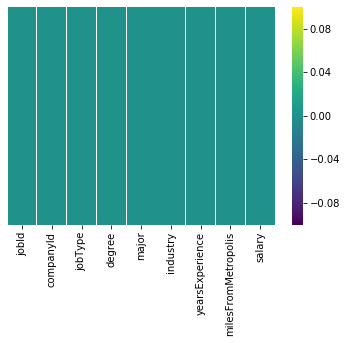

In [9]:
Check_Null_Values(CleanDataFrame1)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64


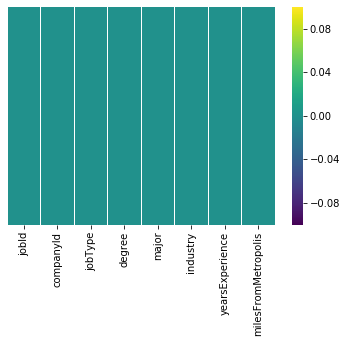

In [10]:
Check_Null_Values(TestDataFrame1)

#### Observation
- In both dataset zero null values in any column.

In [11]:
# check datatype of each features
CleanDataFrame.info()

NameError: name 'CleanDataFrame' is not defined

There are 3 numerical columns </n>
and 6 categorical columns & doesn't have any null value

### ---- 4 Explore the data (EDA) ----

In [ ]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [14]:
CleanDataFrame2 = CleanDataFrame1.copy()
TestDataFrame2 = TestDataFrame1.copy()

#### Functions Required for EDA

In [20]:
def Check_Type_Of_Features_Info(dataframe):
    print('\n-------------------------- Categorical Features Information -------------------------------------')
    Cat_Cols = dataframe.select_dtypes(include=['O']).columns.tolist()
    print('Categorical Columns list: {}'.format(Cat_Cols))
    print('\n\nColumns info: \n{}'.format(dataframe.describe(include='O')))

    print('\n\n-------------------------- Numerical Features Information----------------------------')
    Num_Cols = dataframe.select_dtypes(exclude=['O']).columns.tolist()
    print('Numerical Columns list: {}'.format(Num_Cols))
    print('\n\nColumns info: \n{}'.format(dataframe.describe()))
    
def Visualise_Outliers(dataframe):
    
    fig = plt.figure(figsize=(10, 10))
    sns.boxplot(data=dataframe, orient="h", palette="Set2")
    #for index, column in enumerate(cols):
        #fig.add_subplot(len(column), len(cols), index+1)
        #sns.boxplot(x=dataframe[column])
        
        
def Outlier_Range(dataframe,colname):
    DescriptiveStats = dataframe[colname].describe()
 
    IQR = DescriptiveStats['75%'] - DescriptiveStats['25%']

    upper = DescriptiveStats['75%'] + 1.5 * IQR

    lower = DescriptiveStats['25%'] - 1.5 * IQR

    print('The upper bounds for suspected outliers are {} '.format(upper))
    print('The lower bounds for suspected outliers are {}'.format(lower))

In [70]:
Check_Type_Of_Features_Info(CleanDataFrame2)


-------------------------- Categorical Features Information -------------------------------------
Categorical Columns list: ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


Columns info: 
                   jobId companyId  jobType       degree    major industry
count            1000000   1000000  1000000      1000000  1000000  1000000
unique           1000000        63        8            5        9        7
top     JOB1362684531195    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB
freq                   1     16193   125886       236976   532355   143206


-------------------------- Numerical Features Information----------------------------
Numerical Columns list: ['yearsExperience', 'milesFromMetropolis', 'salary']


Columns info: 
       yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717

### Observation:
- Here, Target feature is Salary column rest others will be independent features (we will exclude jobID, companyID features as they are unique identity key)
- Except salary colum other two features having median and mean close to each other
- Salary: 
    - Mean is greater than median shows its right skewed/ positive sekwed and contains outliers

In [71]:
Check_Type_Of_Features_Info(TestDataFrame2)


-------------------------- Categorical Features Information -------------------------------------
Categorical Columns list: ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


Columns info: 
                   jobId companyId         jobType       degree    major  \
count            1000000   1000000         1000000      1000000  1000000   
unique           1000000        63               8            5        9   
top     JOB1362686195939    COMP13  VICE_PRESIDENT  HIGH_SCHOOL     NONE   
freq                   1     16130          125434       238255   534068   

       industry  
count   1000000  
unique        7  
top     SERVICE  
freq     143161  


-------------------------- Numerical Features Information----------------------------
Numerical Columns list: ['yearsExperience', 'milesFromMetropolis']


Columns info: 
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.21

### Observation:
- Here, all feature vairables will be independent features 
- We will exclude/remove jobID, companyID features as they are unique identity key


###  Visualize box plot for all numerical columns to check outliers

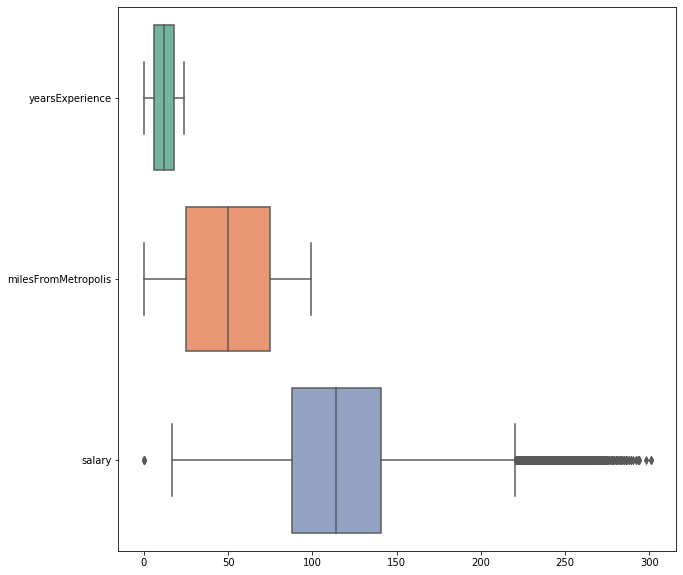

In [21]:
Visualise_Outliers(CleanDataFrame2)

### Remove outlier we use box plot outlier calculation formula
- As we can see above visualizations in box plot "SALARY" column having outliers
- Need to handle those outliers from the dataset
- So use formula to handle outliers:
     - outside 1.5 times the interquartile range above the upper quartile and 
     - below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

In [22]:
Outlier_Range(CleanDataFrame2,"salary")

The upper bounds for suspected outliers are 220.5 
The lower bounds for suspected outliers are 8.5


#### Analysis for upper and lower bonds value in SALARY column

In [23]:
CleanDataFrame2[CleanDataFrame2.salary < 8.5]


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [24]:
# Lets check the rows and its value of outliers whose value is more than upper boud i.e 220.5
CleanDataFrame2[CleanDataFrame2.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [25]:
#check potential outlier above upper bound
CleanDataFrame2.loc[CleanDataFrame2.salary > 222.5, 'jobType'].value_counts()


CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

### Interpretation / Inference
- As there are 7117 rows where salary more than upper bond, so need to go deep and check those rows.
- In any organisation, top most positions are less as compare to low positons
- Hence, as we see most of top most position (like CEO, CTO, CFO etc.) salary are more as compare to low positon (Jr., associates etc)
- Hence, we will not remove those rows as they play an important role in dataset.
- But, as in above results shows 16 juniors also crossing the upperbond, hence lets check the salary of juinors

In [26]:
CleanDataFrame2.loc[(CleanDataFrame2.salary > 222.5) &  (CleanDataFrame2.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


### Observations
- As we check the degree and the industry of those juniors having salary more than upper bond
- Salary make sense, as in finance and oil industry the junior position with good education have good salaries
- Hence we are not removing outliers from having more salary than upperbond.
- We will remove only those outlier values having salary less than lowerbond i.e 0

In [27]:
# So we have 5 rows whose salary is 0 and yeah those are outliers lets remove those rows
CleanDataFrame3 = CleanDataFrame2[CleanDataFrame2.salary > 8.5]
CleanDataFrame3.shape

(999995, 9)

### Lets check correlation between the features

In [28]:
CleanDataFrame3.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [29]:
CleanDataFrame3.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [31]:
def plot_variables(df,var): 
    '''
    produce plot for each features
    plot1(left), the distribution of samples on the feature
    plot2(right), the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 4))
    plt.subplot(1, 2, 1)
    if df[var].dtype == 'int64':
        df[var].value_counts().sort_index().plot()
    else:
        #change the object datatype of each variable to category type and order their level by the mean salary
        mean = df.groupby(var)["salary"].mean()
        df[var] = df[var].astype('category')
        level = mean.sort_values().index.tolist()
        df[var].cat.reorder_categories(level, inplace=True)
        df[var].value_counts().plot()        
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    if df[var].dtype == 'int64' or var == "companyId": # there are many companyId and better to see with line
        #plot the mean salary for each category and shade the line between the (mean - std, mean + std)
        mean = df.groupby(var)["salary"].mean()
        std = df.groupby(var)["salary"].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values,alpha = 0.1)
    else:
        sns.barplot(x= var, y="salary", data= df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salary')
    plt.show()

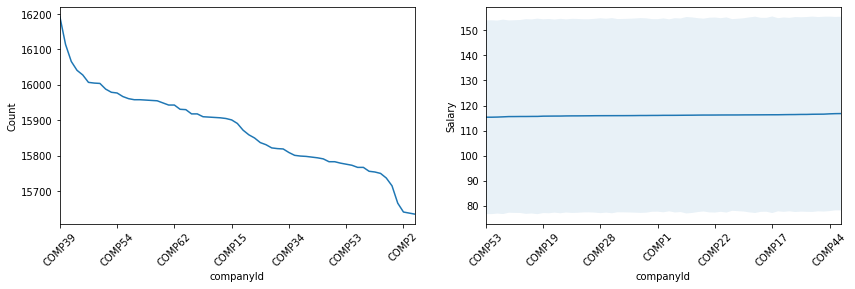

In [32]:
plot_variables(CleanDataFrame3,"companyId")

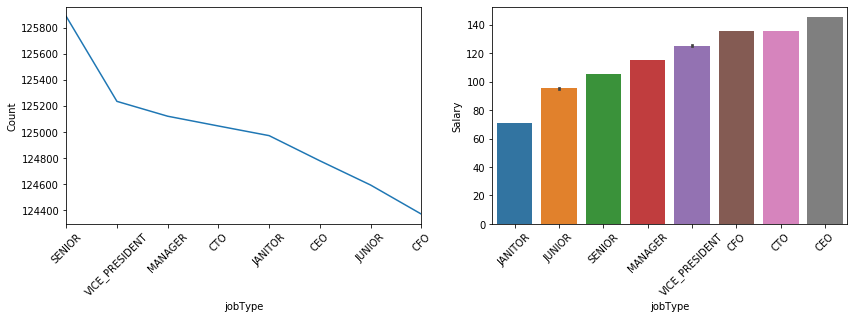

In [33]:
plot_variables(CleanDataFrame3,"jobType")

### Observation:
- Salary vs Job type : jobtype is highly correlated with salary.
- As jobtype or position is increase salary is increase

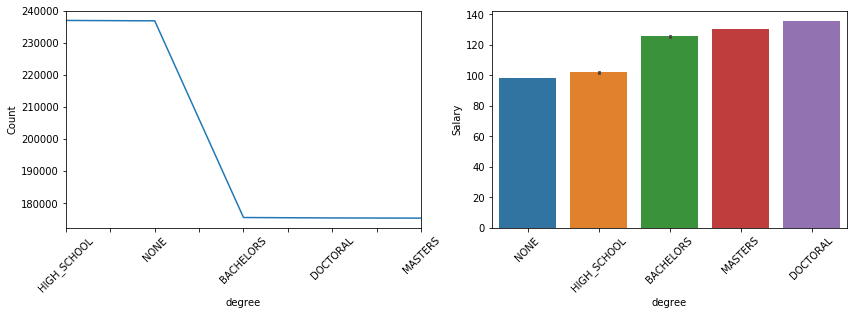

In [34]:
plot_variables(CleanDataFrame3,"degree")

### Observation:
- Salary vs Degree: Degree is correlated with salary.
- As degree is high salary is also high.
- But, for bachelors, masters and doctoral, median salary is same.
- It's true after several years in organisation and getting promoted to higher position salary increase.

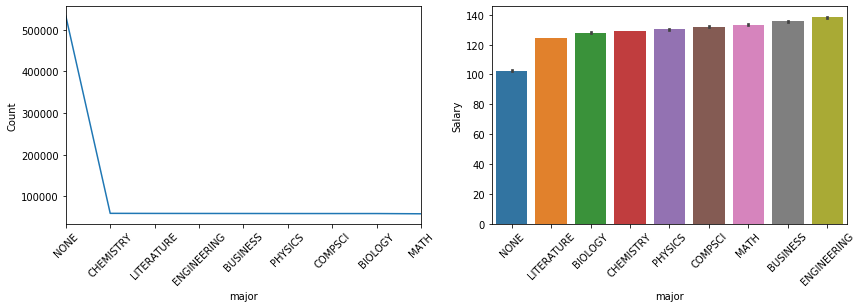

In [35]:
plot_variables(CleanDataFrame3,"major")

### Observation:
- Salary vs major: major is correlated with salary.
- But, for business, engineering, CompsCi, maths salary is more as compare to others.


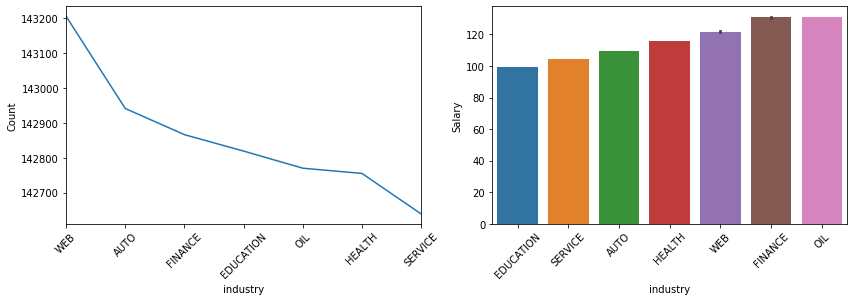

In [36]:
plot_variables(CleanDataFrame3,"industry")

### Observation:
- Salary vs Industry: Industry is correlated with salary.
- Maximum salary earned by employees belongs to Finance and Oil industry.

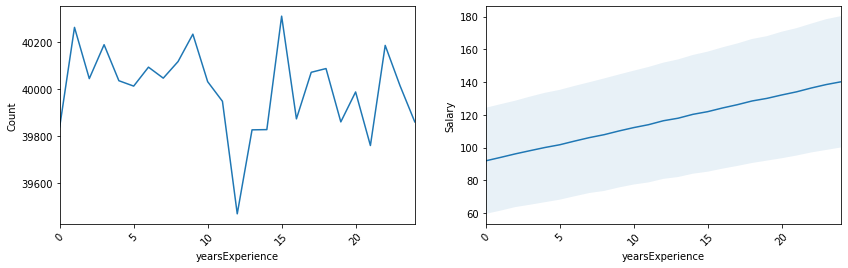

In [37]:
plot_variables(CleanDataFrame3,"yearsExperience")

### Observation:
- Salary vs Years Experience: yearsExperience is correlated with salary.
- As years of experience is more the salary is more, data match with real life scenarios.

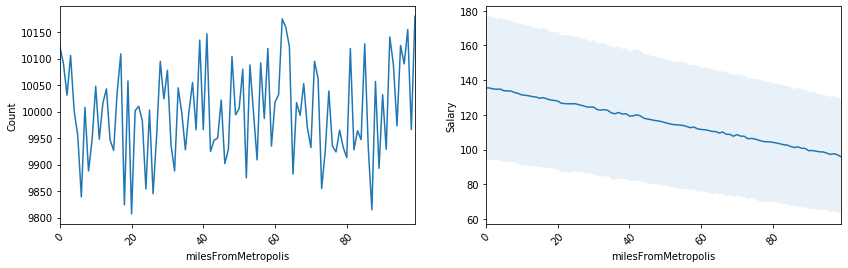

In [38]:
plot_variables(CleanDataFrame3,"milesFromMetropolis")

### Observation:
- Data is distorted hence, unable to say its correlated or not.


### Visualise the corelation between columns

##### Functions used to display correlation between all columns

In [113]:
def Encode_Data(dataframe):   
    from sklearn.preprocessing import LabelEncoder
    for col in dataframe.columns:        
        if dataframe[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            dataframe[col]=le.fit_transform(dataframe[col])
    return dataframe


def Display_Correlation(EncodedData):
    plt.figure(figsize=(12,10))
    corr = EncodedData.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap="PRGn",annot=True,vmin=-1, vmax=1,linewidths=1,linecolor='black')
    plt.show()

In [40]:
VisualData = CleanDataFrame3.copy()

In [41]:
VisualData.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [42]:
VisualData = VisualData.drop(['jobId'],axis=1)

In [43]:
# Encode the data as categorical vairable need to encode into integer form
EncodedData = Encode_Data(VisualData)

In [44]:
EncodedData.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31,1,3,6,3,10,83,113
1,11,0,2,7,6,3,73,84
2,48,7,1,8,3,10,38,120
3,32,5,1,2,0,8,17,125
4,60,7,0,8,2,8,16,146


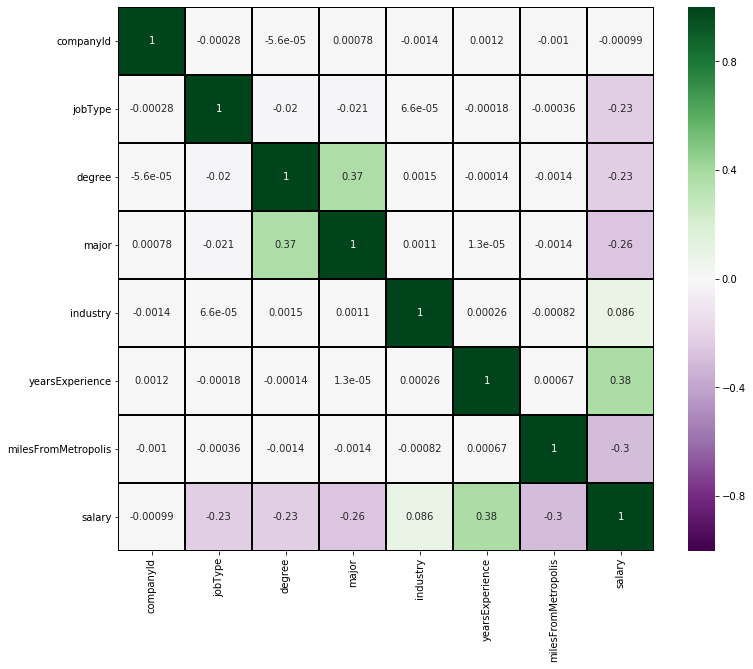

In [114]:
#Pass encoded data to visualise correlation between columns
Display_Correlation(EncodedData)

### Observation:
- As there is an strong correlation between
    - YearsExperience and salary
    - Degree and major

# Prepare DATA for machine learning modelling
### ---- 5 Prepare Data ----
- drop jobID, companyID features from datasets
- Prepare Traget and IV features from datasets

#### Functions used for preparing data

In [129]:
def VisualCountCatVar(dataframe):
    CatCol = dataframe.select_dtypes(include=['category']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(CatCol):
        print("------------",col," value counts---------------------")
        print(dataframe[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in CatCol:
        a = dataframe[i].cat.categories
        print("There are {} categories in {}".format(len(a),i))

In [47]:
CleanDataFrame4 = CleanDataFrame3.copy()
TestDataFrame4 = TestDataFrame2.copy()

In [48]:
print(CleanDataFrame4.shape)
print(TestDataFrame4.shape)

(999995, 9)
(1000000, 8)


#### Instructions
- As we deleted 5 rows as salary for those rows are 0
- Hence above count indicates data is good.
- Now we first delete job_ID, Company_ID from both datasets

In [49]:
CleanDataFrame4 = CleanDataFrame4.drop(['jobId','companyId'],axis=1)
TestDataFrame4 = TestDataFrame4.drop(['jobId','companyId'],axis=1)

In [50]:
print(CleanDataFrame4.shape)
print(TestDataFrame4.shape)

(999995, 7)
(1000000, 6)


##### Instructions
- As columns count match
- now lets check any duplicate values available in train dataset

In [51]:
#Check duplicate values
DuplicatedRowsTrain = CleanDataFrame4[CleanDataFrame4.duplicated()]
DuplicatedRowsTest = TestDataFrame4[TestDataFrame4.duplicated()]
print(DuplicatedRowsTrain.shape)
print(DuplicatedRowsTest.shape)

(10810, 7)
(295025, 6)


#### Actions on duplicate rows
- As we are training model on train dataset.
- We keep test dataset duplicate rows as it won't impact our predictive model.
- Hence, we delete this duplicate rows from train dataset only as it help model to give good RMSE.

In [52]:
CleanDataFrame5 = CleanDataFrame4.drop_duplicates()
print(CleanDataFrame5.shape)

(989185, 7)


In [53]:
TestDataFrame5 = TestDataFrame4.copy()

## Handle Categorical Features

In [130]:
VisualCountCatVar(CleanDataFrame4)

------------ jobType  value counts---------------------
SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64
------------ degree  value counts---------------------
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64
------------ major  value counts---------------------
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64
------------ industry  value counts---------------------
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


------------Number

## Analysis
##### From above results we can infer below information for TRAIN dataset:
- There are 4 categorical column and each have 
    - 8 categories in jobType
    - 5 categories in degree
    - 9 categories in major
    - 7 categories in industry
- It means total 29 dummies will be created
- But we use one hot encoding and remove one category from each category to reduce 4 more features
- Hence, total 25 new features(dummies) will be created.
- Already there are 6 column out of which 4 categorical and 3 integer
   - 3 integer columns + 25 dummies
   - Hence, total 28 features will be there.
   
##### From above results we can infer below information for TEST dataset:
- There are 4 categorical column and each have 
    - 8 categories in jobType
    - 5 categories in degree
    - 9 categories in major
    - 7 categories in industry
- It means total 29 dummies will be created
- But we use one hot encoding and remove one category from each category to reduce 4 more features
- Hence, total 25 new features(dummies) will be created.
- Already there are 6 column out of which 4 categorical and 2 integer
   - 2 integer columns + 25 dummies
   - Hence, total 27 features will be there.

## One hot encoding

In [55]:
CleanDataFrame6 = pd.get_dummies(CleanDataFrame5, drop_first=True)
TestDataFrame6 = pd.get_dummies(TestDataFrame5, drop_first=True)

In [56]:
print("\n Train Dataset",CleanDataFrame6.shape)
print(CleanDataFrame6.columns)
print("\n Test Dataset", TestDataFrame6.shape)
print(TestDataFrame6.columns)


 Train Dataset (989185, 28)
Index(['yearsExperience', 'milesFromMetropolis', 'salary', 'jobType_JUNIOR',
       'jobType_SENIOR', 'jobType_MANAGER', 'jobType_VICE_PRESIDENT',
       'jobType_CFO', 'jobType_CTO', 'jobType_CEO', 'degree_HIGH_SCHOOL',
       'degree_BACHELORS', 'degree_MASTERS', 'degree_DOCTORAL',
       'major_LITERATURE', 'major_BIOLOGY', 'major_CHEMISTRY', 'major_PHYSICS',
       'major_COMPSCI', 'major_MATH', 'major_BUSINESS', 'major_ENGINEERING',
       'industry_SERVICE', 'industry_AUTO', 'industry_HEALTH', 'industry_WEB',
       'industry_FINANCE', 'industry_OIL'],
      dtype='object')

 Test Dataset (1000000, 27)
Index(['yearsExperience', 'milesFromMetropolis', 'jobType_CFO', 'jobType_CTO',
       'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER',
       'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_DOCTORAL',
       'degree_HIGH_SCHOOL', 'degree_MASTERS', 'degree_NONE', 'major_BUSINESS',
       'major_CHEMISTRY', 'major_COMPSCI', 'major_ENGINEERING',

# ------ Model building-----

### ---- 6 Establish a baseline ----

In [57]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

#### BaseModel
- As XGboost is very popular for regression problem
- Hence, i am taking XGBoost as base model
- Perform 5-fold cross-validation to check RMSE.

In [58]:
# Create independent and dependent variables in train dataset
TrainIV = CleanDataFrame6.drop(['salary'], axis=1)
TrainDV = CleanDataFrame6['salary']
print("TrainIV : ",TrainIV.shape)
print("TrainDV : ",TrainDV.shape)

TrainIV :  (989185, 27)
TrainDV :  (989185,)


In [59]:
from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.metrics import make_scorer,accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
import xgboost

In [60]:
#Split dataset
X_BaseModelTrain, X_BaseModelTest, Y_BaseModelTrain, Y_BaseModelTest = train_test_split(TrainIV,TrainDV, test_size=0.30, random_state = 0)


In [61]:
#Create XGBoost model and fit with train dataset
XGBoostBaseModel = xgboost.XGBRegressor()

In [62]:
XGBoostBaseModel.fit(X_BaseModelTrain, Y_BaseModelTrain)
y_BaseModelPred= XGBoostBaseModel.predict(X_BaseModelTest)
#cv_results = cross_validate(clf, X_BaseModelTrain,Y_BaseModelTrain, cv=10)
BaseModelRMSE = mean_squared_error(Y_BaseModelTest, y_BaseModelPred)

print("Mean square error for Base model is : ",BaseModelRMSE)

[21:11:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean square error for Base model is :  431.0294886568374


In [63]:
scores = cross_validate(XGBoostBaseModel, X_BaseModelTrain,Y_BaseModelTrain, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
NegRMSE = -1.0*np.mean(scores['test_neg_mean_squared_error'])
print("Mean square error for model ",XGBoostBaseModel, NegRMSE)

[21:13:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean square error for model  XGBRegressor() 431.1999994680333


# Part 3 - DEVELOP

### ---- 7. Try some other alogrithms ----

- LinearRegression
- RandomForestRegressor
- Lasso
- GaussianNB
- DecisionTreeRegressor
- GradientBoostingRegressor

#### we check basic RMSE score for each model and select best scoring model for hyper parameter tunning

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
RegressorModels = []
num_procs = 4

model1 = LinearRegression()
RegressorModels.append(model1)

model2 = RandomForestRegressor(n_estimators = 100, n_jobs = num_procs, max_depth = 25, min_samples_split = 60) 
RegressorModels.append(model2)

model3 = linear_model.Lasso(alpha=0.1)
RegressorModels.append(model3)

model4 = GaussianNB()
RegressorModels.append(model4)

model5 = DecisionTreeRegressor(max_depth = 15)
RegressorModels.append(model5)

model6 = GradientBoostingRegressor(n_estimators = 50, max_depth = 10) 
RegressorModels.append(model6)

In [66]:
#Import necesseary libraries
from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.metrics import make_scorer,accuracy_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [160]:
for RegressorModelName in RegressorModels:
    
    print("\n\n-------------",RegressorModelName,"-----------------\n")
    
    RegressorModelName.fit(X_BaseModelTrain, Y_BaseModelTrain)
    y_BaseModelPred= RegressorModelName.predict(X_BaseModelTest)
    
    ModelRMSE = mean_squared_error(Y_BaseModelTest, y_BaseModelPred)

    print("Mean square error for ",RegressorModelName,"is : ",ModelRMSE)




------------- LinearRegression() -----------------

Mean square error for  LinearRegression() is :  386.859155373323


------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------

Mean square error for  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) is :  374.888170279677


------------- Lasso(alpha=0.1) -----------------

Mean square error for  Lasso(alpha=0.1) is :  397.29693372818497


------------- GaussianNB() -----------------

Mean square error for  GaussianNB() is :  9863.77303912979


------------- DecisionTreeRegressor(max_depth=15) -----------------

Mean square error for  DecisionTreeRegressor(max_depth=15) is :  439.9962944024124


------------- GradientBoostingRegressor(max_depth=10, n_estimators=50) -----------------

Mean square error for  GradientBoostingRegressor(max_depth=10, n_estimators=50) is :  366.32870795060876


##### Base model XGBoost RMSE:   431.200

### Other Models RMSE
- LinearRegression :         386.860
- RandomForestRegressor:     374.888
- Lasso:                     397.296
- GaussianNB:                9863.773
- DecisionTreeRegressor:     439.996
- GradientBoostingRegressor: 366.328

#### Here gradient boosting regressor give good performance as compare to others

### ------- 8. Select best model  & Hyper parameter optimisation ----------

In [162]:
from sklearn.model_selection import cross_validate  #Additional scklearn functions
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV   #Perforing grid search

Regressor = GradientBoostingRegressor()

In [163]:
#Randomized search cv 1
n_estimator = [100,500,900,1100,1500]
MaxDepth = [2,3,5,10,15]
LearningRate = [0.05,0.1,0.15,0.20]
MaxFeatures = ['sqrt','log2']
SubSample = [.5,.75,1]
MinSampleSplit = 500
MinSampleLeaf = 50
RandomState = 10
CrossValidation = 5
NumberOfJobs = 4

#define hyper parameter grid for randomise serach cv
hyperparameter_Grid = {'n_estimators':n_estimator,
                     'learning_rate':LearningRate,
                     'max_depth':MaxDepth,
                     'subsample':SubSample,
                    'max_features': MaxFeatures,
                    
}

In [164]:
random_cv = RandomizedSearchCV(estimator = Regressor,
                               param_distributions=hyperparameter_Grid,
                               cv = 5, n_iter=5,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42
                              )

In [165]:
random_cv.fit(X_BaseModelTrain, Y_BaseModelTrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 14.0min
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 29.2min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500],
                                        'subsample': [0.5, 0.75, 1]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [166]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          n_estimators=1100, subsample=1)

In [167]:
RandomizeParamModel = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          n_estimators=1100, subsample=1)

In [168]:
RandomizeParamModel.fit(X_BaseModelTrain, Y_BaseModelTrain)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          n_estimators=1100, subsample=1)

In [169]:
y_RandomizeParamModelPrediction = RandomizeParamModel.predict(X_BaseModelTest)

In [170]:
from sklearn.metrics import mean_squared_error

GradientBosstingRMSE = mean_squared_error(Y_BaseModelTest, y_RandomizeParamModelPrediction)

print("Mean square error for model ",GradientBosstingRMSE)

Mean square error for model  358.9652777303112


In [171]:
import pickle
filename = 'RandomizeParamModel.pkl'
pickle.dump(RandomizeParamModel,open(filename,'wb'))

In [172]:
#giving this randomised serch cv parameters to grid search cv and lets check what he predict

In [173]:
param_grid = {
    
    'max_depth': [random_cv.best_params_['max_depth']],
    'max_features': [random_cv.best_params_['max_features']],
    'subsample': [random_cv.best_params_['subsample']],
    'learning_rate': [random_cv.best_params_['learning_rate']],
    #i take 3 values and give additonal values and ask to check with some other values too along with best parameters
    'n_estimators': [random_cv.best_params_['n_estimators'] - 200, random_cv.best_params_['n_estimators'] - 100, 
                     random_cv.best_params_['n_estimators'], 
                     random_cv.best_params_['n_estimators'] + 100, random_cv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_depth': [5], 'max_features': ['sqrt'], 'subsample': [1], 'learning_rate': [0.05], 'n_estimators': [900, 1000, 1100, 1200, 1300]}


In [175]:
#### Fit the grid_search to the data
#It will not have option to set the iteration
#But it will work.. as number of parameters like here 1*1*1*3*5*5 = 75 iteration
Regressor2=GradientBoostingRegressor()
grid_search=GridSearchCV(estimator=Regressor2,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_BaseModelTrain, Y_BaseModelTrain)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 32.7min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 36.4min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'max_features': ['sqrt'],
                         'n_estimators': [900, 1000, 1100, 1200, 1300],
                         'subsample': [1]},
             verbose=2)

In [176]:
y_GridCVParamModelPrediction = grid_search.predict(X_BaseModelTest)

In [177]:
from sklearn.metrics import mean_squared_error

GradientBosstingGridRMSE = mean_squared_error(Y_BaseModelTest, y_GridCVParamModelPrediction)

print("Mean square error for model ",GradientBosstingGridRMSE)

Mean square error for model  358.5399282686439


In [178]:
import pickle
filename = 'GridSearchCVModel.pkl'
pickle.dump(grid_search,open(filename,'wb'))

## Part 4 - DEPLOY

### ---- 9 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [179]:
#Export model in pickle file with GridSearchCV parameter giving best RMSE score.
import pickle
filename = 'BestModelSalaryPrediction.pkl'
pickle.dump(grid_search,open(filename,'wb'))

In [180]:
PredictionTestDataSet = grid_search.predict(TestDataFrame6)

In [185]:
TestDataFrame1.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [182]:
PredictionTestDataSet

array([142.65335111, 140.95108187, 135.19303167, ..., 105.13272017,
       114.90326135, 156.44893406])

In [192]:
PredictionDataFrame = TestDataFrame1.copy()

In [193]:
PredictionDataFrame['Predictions'] = PredictionTestDataSet

In [194]:
PredictionDataFrame.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Predictions
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,142.653351
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,140.951082
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,135.193032
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,123.620657
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,117.002843


### ---- 10 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [196]:
PredictionDataFrame.to_csv(r'SalaryPrediction.csv', index = False)

### ---- 11 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data